# Классификация - и снова в бой!

Сегодня мы поговорим о том, чему же мы научились за последние практики?

Мы освоили основным методы работы как с данными, на основе которых можно решить задачу классификации, так и с моделями, которые это делают! Щикарррно!

Сегодняшняя задачка как всегда несложная, но очень важная - нам предстоит предсказывать болезни сердца!

В вашем распоряжении датасет [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci). Ваша задача предсказать, есть ли у человека заболевание сердца или нет.

Как всегда, ждем от вас полноценного анализа исходных данных, подготовка необходимой предобработки, feature engineering и поиск лучшего варианта, которный даст наибольшую метрику!

* Задача под звездочкой. Попробуйте реализовать такую систему, которая реже пропускает больных пациентов - мы ведь не хотим больным людям говорить, что они здоровы, хотя это не так?

Мы желаем вам удачи - постарайтесь применить все накопленные знания и, может, чуть больше! Успехов!

____________________________________________________________________________________

Загрузим все необходимые библиотеки и инструменты:

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, plot_precision_recall_curve, plot_roc_curve, confusion_matrix
import phik

Найстройка визуала:

In [2]:
TEXT_COLOR = 'white'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = TEXT_COLOR
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.markersize'] = 15
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

sns.set_style('darkgrid')
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

Теперь перейдем к знакомству с данными:

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- age - возраст
- sex - пол 
- chest pain - тип боли в груди 
- resting blood pressure - артериальное давление в покое
- serum cholestoral in mg/dl - сыворочный холестерин в мг/дл
- fasting blood sugar > 120 mg/dl - Уровень сахара в крови натощак > 120 мг/дл (1 = больше 120, 0 = меньше 120)
- resting electrocardiographic results  - результаты электрокардиографии в покое
- maximum heart rate achieved - максимальная частота пульса
- exercise induced angina - стенокардия, вызванная физической нагрузкой
- oldpeak = ST depression induced by exercise relative to rest - значение стресс-теста ЭКГ относительно отдыха
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy - количество крупных сосудов, окрашенных флурозопией
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect - талассемия: 3=нормальный, 6=исправленный дефект, 7=обратимы дефект
- target - есть болезнь или нет 

In [5]:
print('Размер данных:', df.shape)

Размер данных: (303, 14)


Посмотрим информацию о данных:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


В данных 13 признаков вместе с целевым признаком

Проверим на пропуски

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Пропусков в данных нет

Следует просмотреть целевую функцию:

In [8]:
df.target.unique()

array([1, 0], dtype=int64)

Получается целевая функция имееет бинарный вид

1    165
0    138
Name: target, dtype: int64

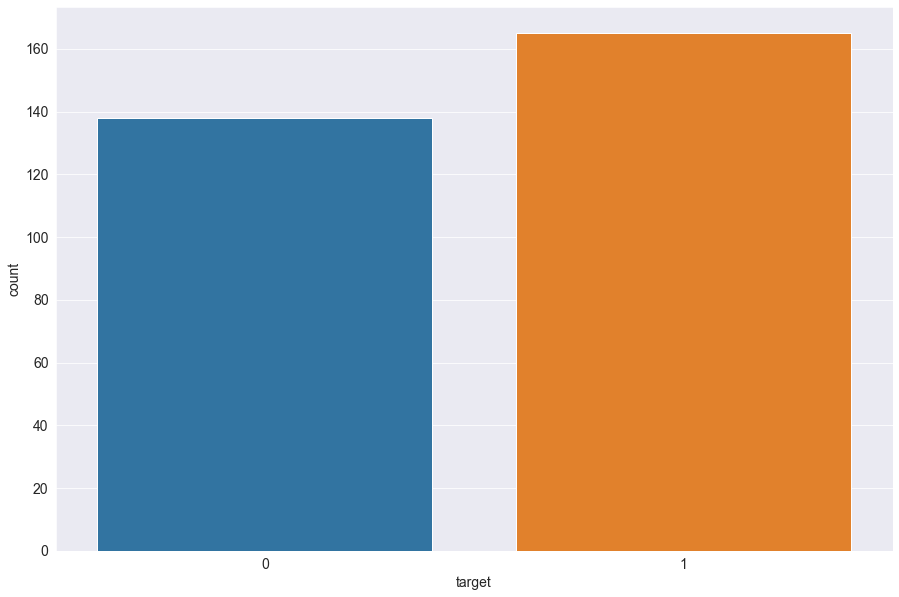

In [9]:
sns.countplot(data = df, x = 'target')
df.target.value_counts()

Данные целевой функции соотносимы

Посмотрим на распределение данных:

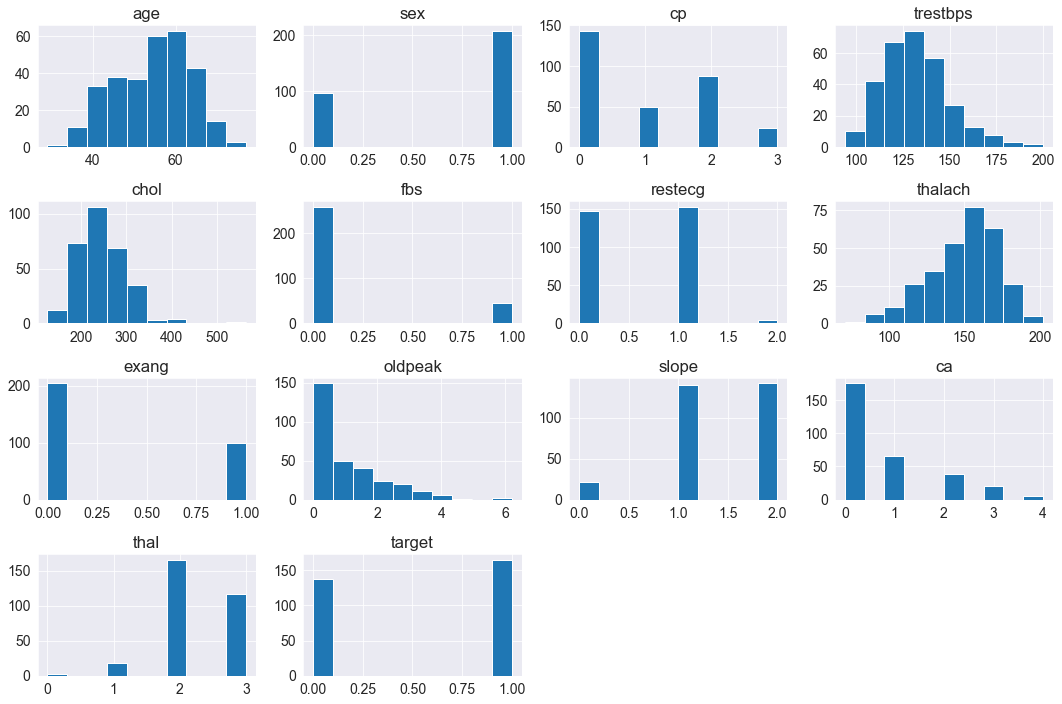

In [10]:
df.hist()
plt.tight_layout()

- Бинарное распределение наблюдается на графиках: sex, fbs, exang,  target
- Дискретные признаки: cp(0, 1, 2, 3), restecg (0, 1, 2), slope (0, 1, 2), сa (0, 1, 2, 3, 4), thal (0, 1, 2, 3)
- Непрерывные признаки: age, trestbps, chol, thalach, oldpeak
- значения slope по больше части принимают 1, 2 , есть несколько значений в 0
- "са" имеет выброс в виде 4, в описании признака дано, что "са" принимает значения от 0 до 3
- распределение "oldpeak" ассиметрично, смещено влево, с явным "правым хвостом"
- распределения признаков age, trestbps, chol, thalach унимодальны, но смещены относительно центра
- значения "thal" в основном распределены в 2, 3

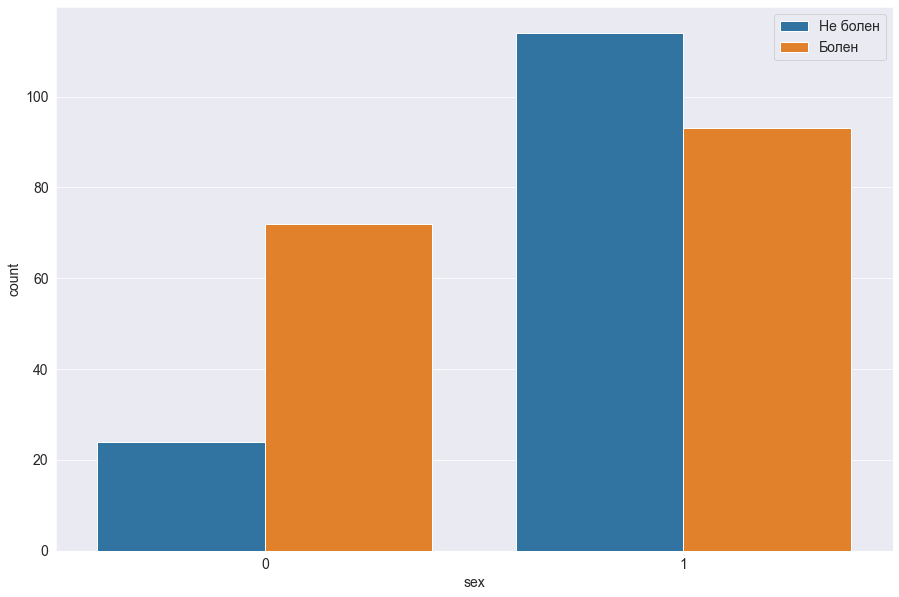

In [11]:
sns.countplot(data = df, x = 'sex', hue = 'target')
plt.legend(['Не болен', "Болен"])

Здоровых мужчин больше, чем здоровых женщин 

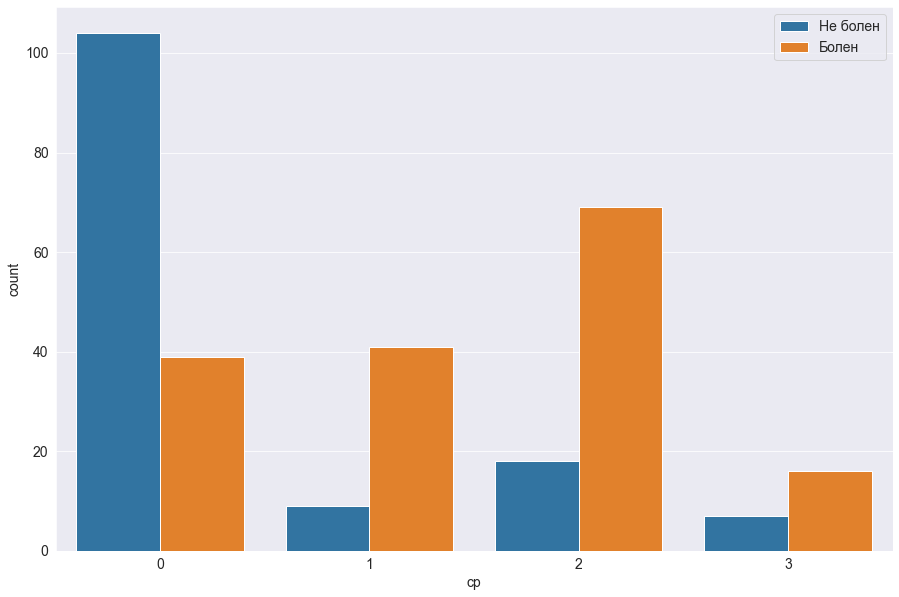

In [12]:
sns.countplot(data = df, x = 'cp', hue = 'target')
plt.legend(['Не болен', "Болен"])

По типу боли в груди видно, если значение отлично от 0, то диагноз подтверждается чаще, особенно при 2 типе

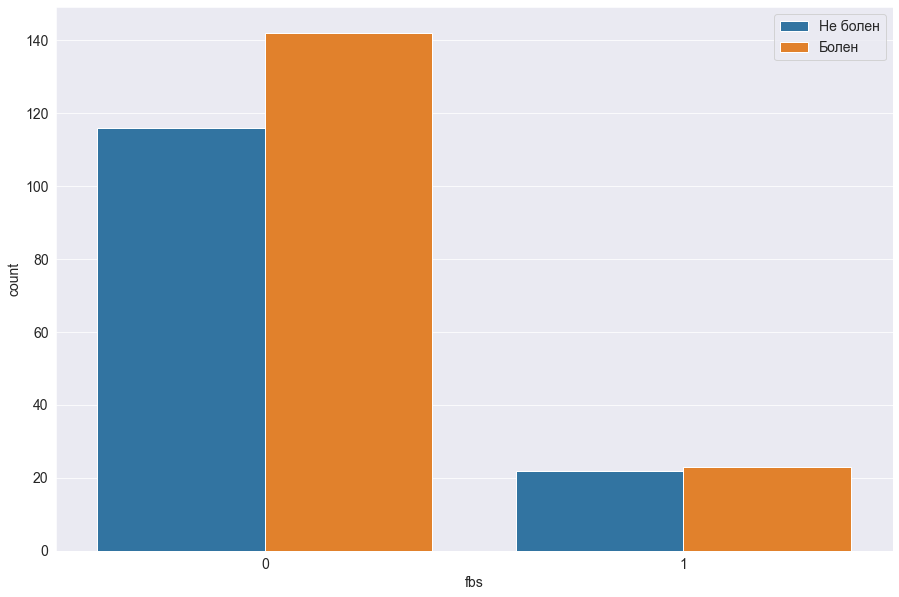

In [13]:
sns.countplot(data = df, x = 'fbs', hue = 'target')
plt.legend(['Не болен', "Болен"])

По уровню сахара в крови ничего конкретного не сказать

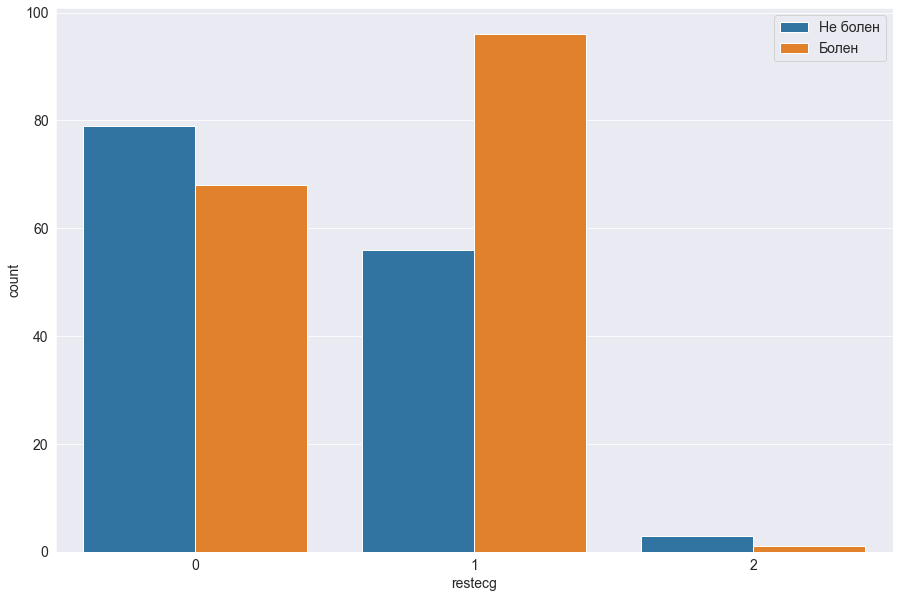

In [14]:
sns.countplot(data = df, x = 'restecg', hue = 'target')
plt.legend(['Не болен', "Болен"])

По результатам электрокардиографии при отклонении от нормы количество больных больше

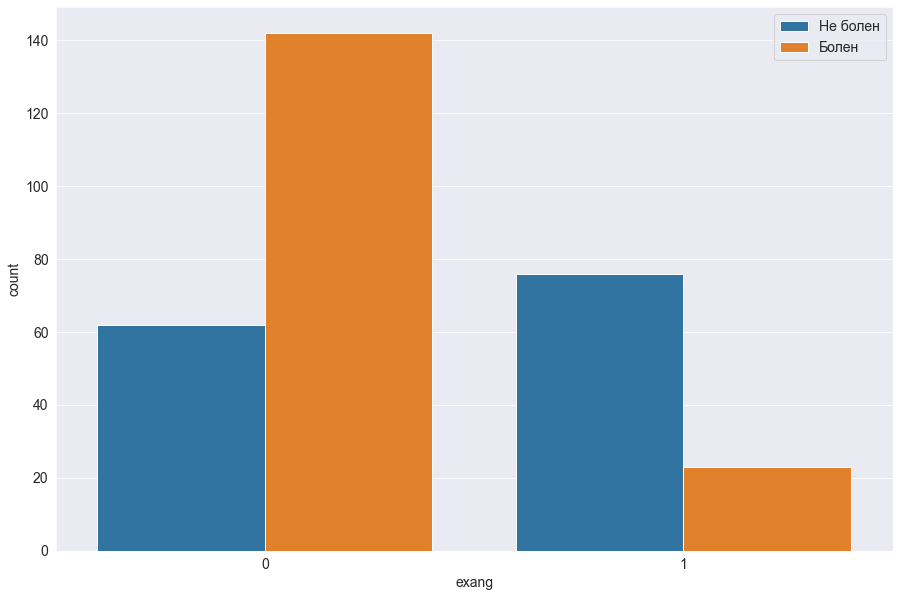

In [15]:
sns.countplot(data = df, x = 'exang', hue = 'target')
plt.legend(['Не болен', "Болен"])

Физическая нагрузка не сильно влияет на выявление стенокардии

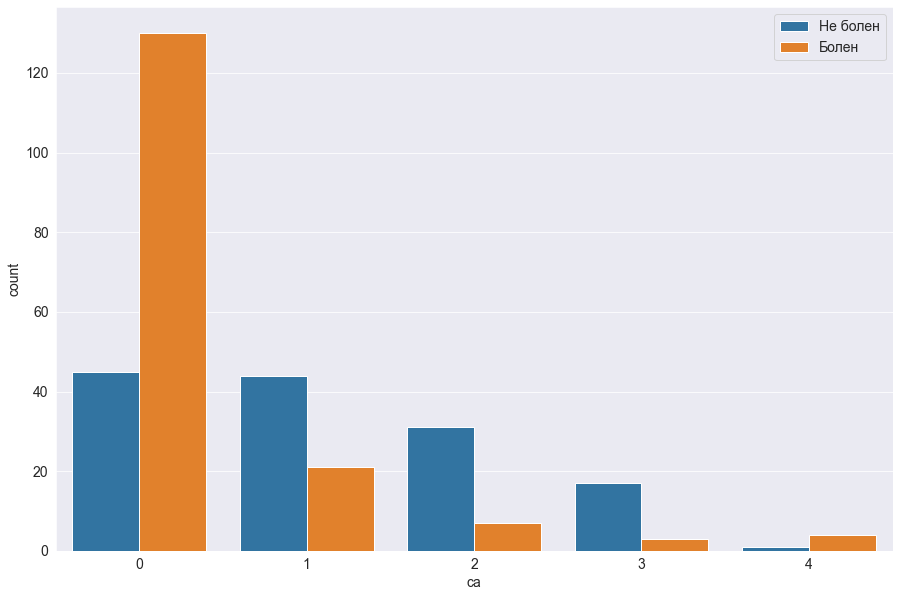

In [16]:
sns.countplot(data = df, x = 'ca', hue = 'target')
plt.legend(['Не болен', "Болен"])

У большинства больных пациентов обнаруживается 0 крупных сосудов, окрашенных фторозопиами.

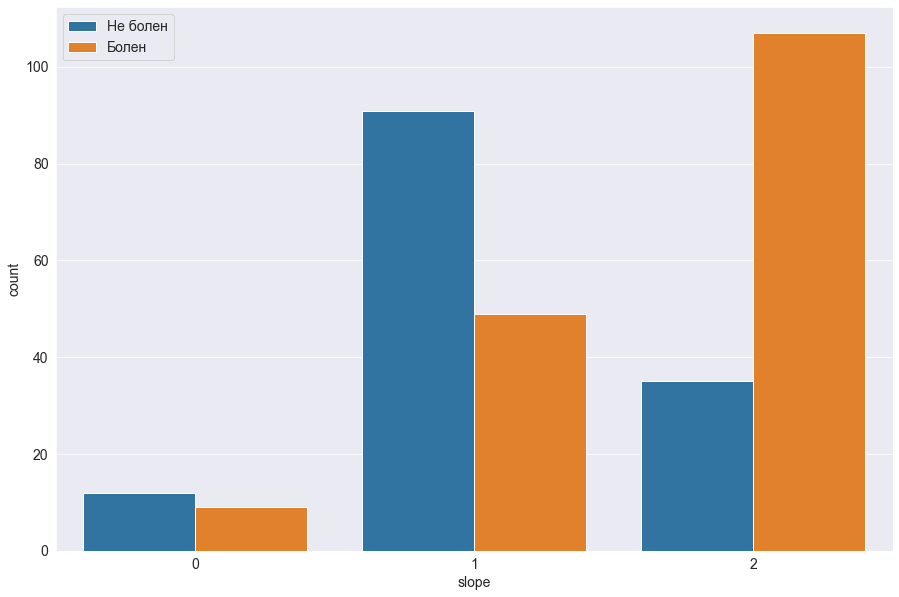

In [17]:
sns.countplot(data = df, x = 'slope', hue = 'target')
plt.legend(['Не болен', "Болен"])

При пиковой нагрузке 2 большее количество больных, при 1 же здоровых, при 0 примерно одинаковое количество

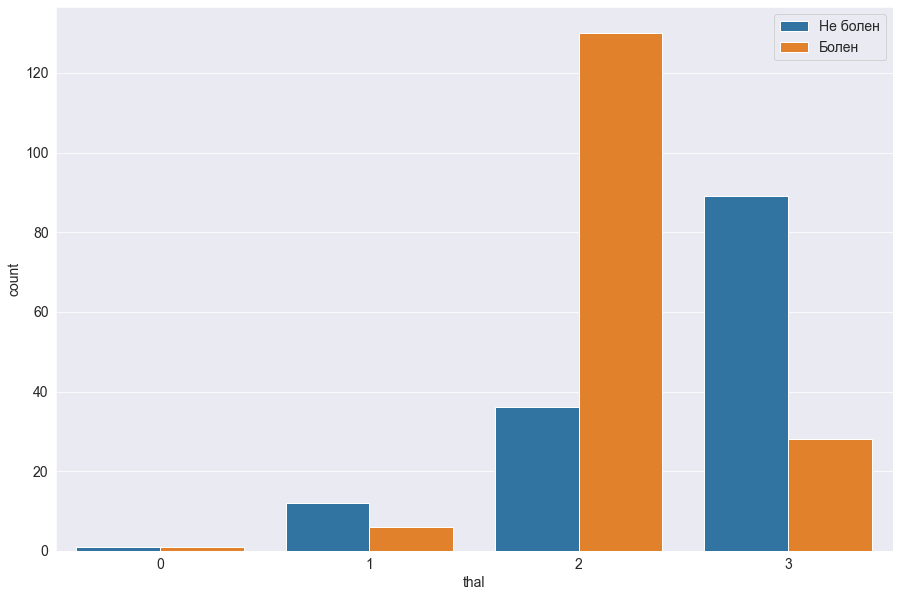

In [18]:
sns.countplot(data = df, x = 'thal', hue = 'target')
plt.legend(['Не болен', "Болен"])

У больных наблюдается фиксированный дефект

Дискретные признаки рассмотрели, перейдем теперь к непрерывным:

<AxesSubplot:xlabel='age', ylabel='Count'>

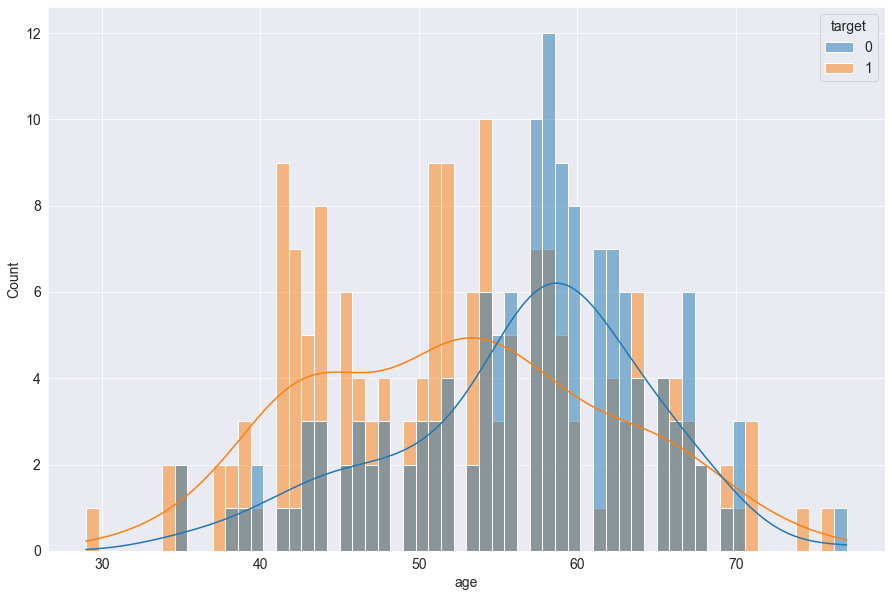

In [19]:
sns.histplot(data = df, x = 'age', hue = 'target', bins = 60, kde = True)


По распределению можно заметить, что риск заболевания возрастает после 40 лет

Посмотрим на некоторые статистические показатели:

In [20]:
print(f'Минимальный возраст: {df.age.min()}')
print(f'Максимальный возраст: {df.age.max()}')
print(f'Самый частый встречающийся возраст: {df.age.mode().values}')
print(f'Самое частый возраст у больных пациентов: {df.loc[df.target == 1].age.mode().values}')

Минимальный возраст: 29
Максимальный возраст: 77
Самый частый встречающийся возраст: [58]
Самое частый возраст у больных пациентов: [54]


<AxesSubplot:xlabel='trestbps', ylabel='Count'>

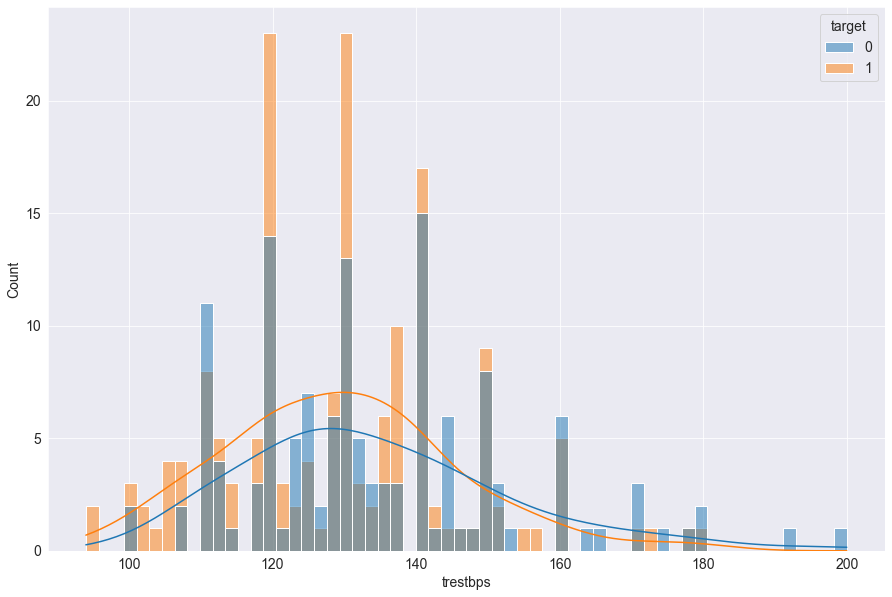

In [21]:
sns.histplot(data = df, x = 'trestbps', hue = 'target', bins = 60, kde = True)

Большинство больных пациентов имеют артериальное давление 120–140.

In [22]:
print(f'Минимальное артериальное давление: {df.trestbps.min()}') 
print(f'Максимальное артериальное давление: {df.trestbps.max()}') 
print(f'Самое частое значение: {df.trestbps.mode().values}')
print(f'Самое частое значение у больных пациентов: {df.loc[df.target == 1].trestbps.mode().values}')

Минимальное артериальное давление: 94
Максимальное артериальное давление: 200
Самое частое значение: [120]
Самое частое значение у больных пациентов: [120 130]


<AxesSubplot:xlabel='chol', ylabel='Count'>

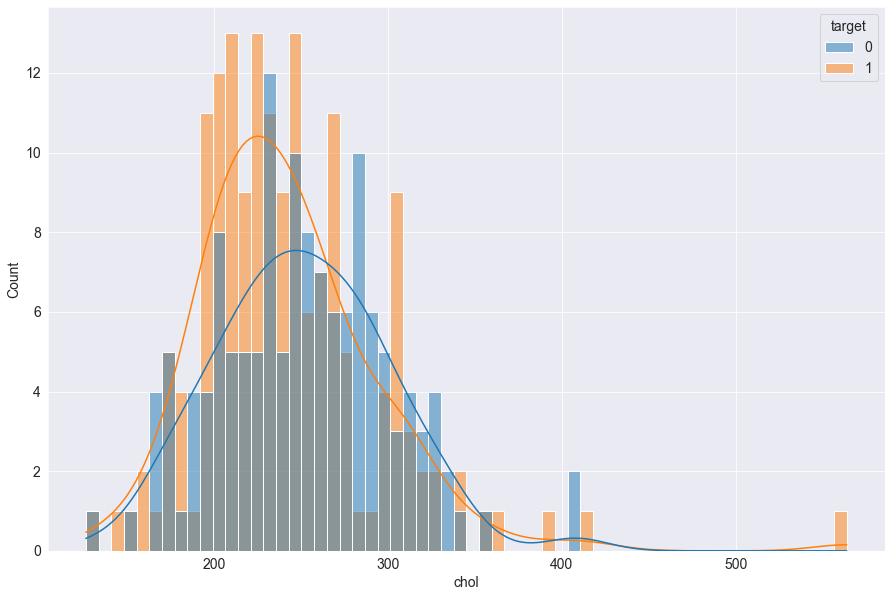

In [23]:
sns.histplot(data = df, x = 'chol', hue = 'target', bins = 60, kde = True)

In [24]:
print(f'Минимальный холестерин: {df.chol.min()}')
print(f'Максимальный холестерин: {df.chol.max()}')
print(f'Самое частое значение: {df.chol.mode().values}')
print(f'Самое частое значение у больных пациентов: {df.loc[df.target == 1].chol.mode().values}')

Минимальный холестерин: 126
Максимальный холестерин: 564
Самое частое значение: [197 204 234]
Самое частое значение у больных пациентов: [197 204 211 226 234 240]


При значении холестерина около 200 и больше, количество больных людей больше

<AxesSubplot:xlabel='thalach', ylabel='Count'>

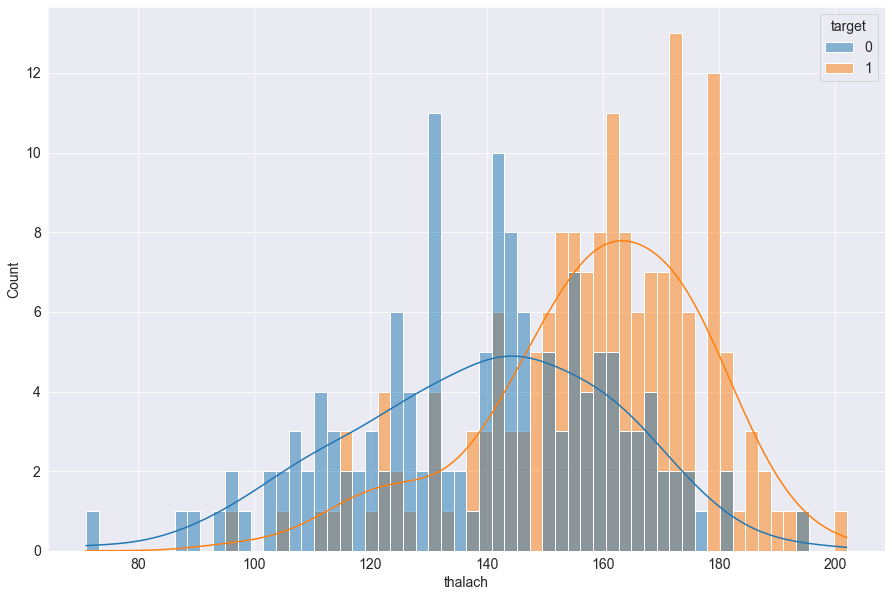

In [25]:
sns.histplot(data = df, x = 'thalach', hue = 'target', bins = 60, kde = True)

In [26]:
print(f'Минимальная частота пульса: {df.thalach.min()} ')
print(f'Максимальная частота пульса: {df.thalach.max()} ')
print(f'Самое частое значение: {df.thalach.mode().values}')
print(f'Самое частое значение у больных пациентов: {df.loc[df.target==1].thalach.mode().values}')

Минимальная частота пульса: 71 
Максимальная частота пульса: 202 
Самое частое значение: [162]
Самое частое значение у больных пациентов: [162]


При большой частоте пульса заболеваемость более вероятна

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

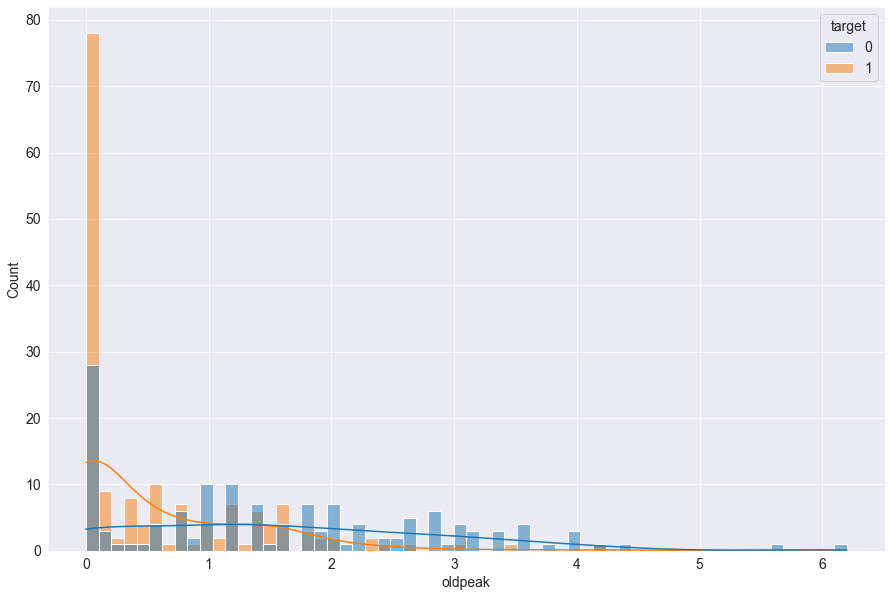

In [27]:
sns.histplot(data = df, x = 'oldpeak', hue = 'target', bins = 60, kde = True)

In [28]:
print(f'Min trestbps: {df.oldpeak.min()} ')
print(f'Min trestbps: {df.oldpeak.max()} ')
print(f'Самое частое значение: {df.oldpeak.mode().values}')
print(f'Самое частое значение у больных пациентов: {df.loc[df.target == 1].oldpeak.mode().values}')

Min trestbps: 0.0 
Min trestbps: 6.2 
Самое частое значение: [0.]
Самое частое значение у больных пациентов: [0.]


Большиснтво пациентов имеют oldpeak=0. Кроме, того при oldpeak=0 количество больных пациентов в разы больше чем здоровых пациентов.

Рассмотрим корреляцию переменных:

interval columns not set, guessing: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


<AxesSubplot:>

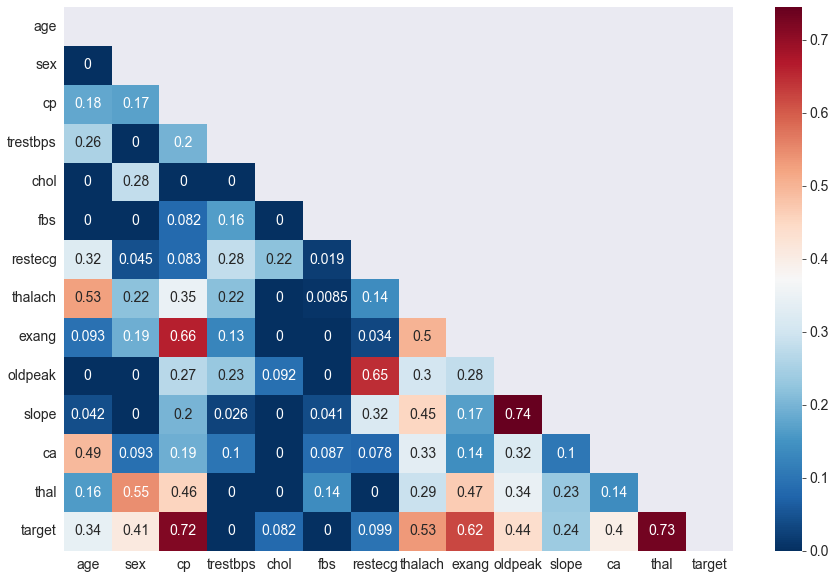

In [29]:
phik_matrix_ = df.phik_matrix()
mask = np.zeros_like(phik_matrix_)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(phik_matrix_, xticklabels=phik_matrix_.columns, yticklabels=phik_matrix_.columns, cmap = 'RdBu_r', annot = True, mask = mask)

Самые высокие значения корреляции у пар:
- slope-oldpeak
- rectecg-oldpeak
- exang - cp

С target:
- cp
- exang
- thal
- thalach

План предобработки данных:

- Очистка данных, удаление выбросов.
- Отбор признаков по коэффициенту корреляции.
- Нормализация данных.

In [30]:
df_train, df_test = train_test_split(df, test_size = 0.3, shuffle = True, stratify = df.target, random_state = RANDOM_SEED)

print(f'Размер выборки обучения: {df_train.shape}\nРазмер выборки тестирования: {df_test.shape}\n')
print(f'Соотношение классов в обучающей выборке:\n{df_train.target.value_counts()}\n')
print(f'Соотношение классов в тестовой выборке:\n{df_test.target.value_counts()}\n')

Размер выборки обучения: (212, 14)
Размер выборки тестирования: (91, 14)

Соотношение классов в обучающей выборке:
1    115
0     97
Name: target, dtype: int64

Соотношение классов в тестовой выборке:
1    50
0    41
Name: target, dtype: int64



Построим Baseline

In [31]:
def baseline(df, test):
    
    class_1_prob = len(df[df.target == 1]) / len(df)
    class_0_prob = len(df[df.target == 0]) / len(df)
    
    if class_1_prob > class_0_prob:
        basline_predict = 1
    else:
        basline_predict = 0
        
    return basline_predict * np.ones_like(test.target)

In [32]:
y_baseline_pred = baseline(df, df_test)
y_baseline_test = df_test.copy().pop('target').to_numpy()

Построим матрицу ошибок

In [33]:
def conf_mtrx(test, pred):
    cm = confusion_matrix(test, pred)

    ax = sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=['Не болен', 'Болен'], yticklabels=['Не болен', 'Болен'], cmap='RdBu_r')
    ax.set_ylabel('TRUE')
    ax.set_xlabel('PREDICT')
    plt.show()
    return

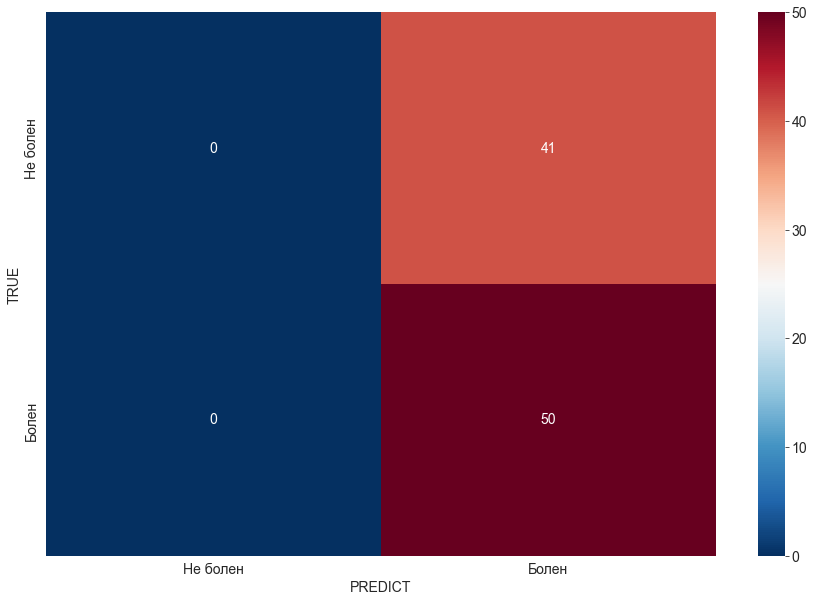

In [34]:
conf_mtrx(y_baseline_test, y_baseline_pred)

Так как в baseline предсказвает только наиболее частый класс (класс 1), то TN и FN равны 0, так как модель обнаружила все 1, а все 0 определила как 1.

In [35]:
report_baseline = classification_report(y_baseline_test, y_baseline_pred)
print(report_baseline)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.55      1.00      0.71        50

    accuracy                           0.55        91
   macro avg       0.27      0.50      0.35        91
weighted avg       0.30      0.55      0.39        91



C:\Users\dns\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dns\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dns\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedM

Показатели получились низкие. Проведем предобработку данных и воспользуемся логистической регрессией 

In [36]:
#Функция очистки данных для са
def clean_data(df):
    df = df.copy()
    df.replace([4], df.ca.mode(), inplace=True)
    return df

In [37]:
df_train = clean_data(df_train)
df_test = clean_data(df_test)
pd.concat([df_train, df_test], axis = 0).ca.isin([4]).sum()

0

Удалим признаки по анализу корреляции

In [38]:
drop_columns = ['restecg', 'slope', 'trestbps', 'chol', 'fbs']

#функция удаления колонок

def drop_corr_columns(df, columns):
    df = df.drop(columns, axis = 1)
    return df

df_train = drop_corr_columns(df_train, drop_columns)
df_test = drop_corr_columns(df_test, drop_columns)

Разделим данные на содержащие целевой признак и признаки для обучения

In [39]:
X_train = df_train.copy()
y_train = X_train.pop('target')
X_test = df_test.copy()
y_test = X_test.pop('target')

Данные для обучения:

In [40]:
X_train.head()

,age,sex,cp,thalach,exang,oldpeak,ca,thal
144,76,0,2,116,0,1.1,0,2
215,43,0,0,136,1,3.0,0,3
230,47,1,2,152,0,0.0,0,2
66,51,1,2,143,1,1.2,0,2
288,57,1,0,143,1,3.0,1,3


Можно увидеть, что thalach имеет слишком большие значения, следует нормализовать данные:

In [41]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(data = scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = X_test.columns)
X_train.head()

,age,sex,cp,thalach,exang,oldpeak,ca,thal
0,0.979167,0.0,0.666667,0.245614,0.0,0.177419,0.000000,0.666667
1,0.291667,0.0,0.000000,0.421053,1.0,0.483871,0.000000,1.000000
2,0.375000,1.0,0.666667,0.561404,0.0,0.000000,0.000000,0.666667
3,0.458333,1.0,0.666667,0.482456,1.0,0.193548,0.000000,0.666667
4,0.583333,1.0,0.000000,0.482456,1.0,0.483871,0.333333,1.000000


Применим логистическую регрессию

In [42]:
model_clf = LogisticRegression(max_iter = 100000, random_state = RANDOM_SEED)
model_clf.fit(X_train, y_train)
y_pred = model_clf.predict(X_test)
y_probs = model_clf.predict_proba(X_test)

Параметры модели:

Веса:

In [43]:
weights = pd.Series(data = abs(model_clf.coef_[0,:]), index = X_train.columns).sort_values(ascending = False)
print(weights)

cp         2.075770
oldpeak    2.009477
thal       1.661774
ca         1.650934
thalach    1.577911
exang      1.177218
sex        1.006929
age        0.375200
dtype: float64


У признака "возраст" самый маленький вес, самый большой у признака "тип боли в груди"

Составим матрицу ошибок:

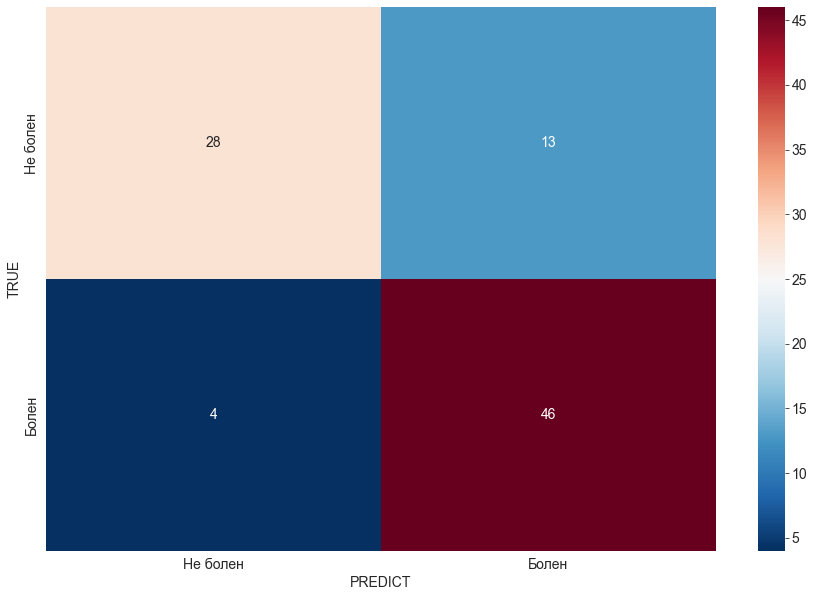

In [44]:
conf_mtrx(y_test, y_pred)

Показатели лучше, чем у Baseline

Посмотрим на метрики модели

In [45]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        41
           1       0.78      0.92      0.84        50

    accuracy                           0.81        91
   macro avg       0.83      0.80      0.81        91
weighted avg       0.82      0.81      0.81        91



Общая точность модели: 81%

In [46]:
print(report_baseline)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.55      1.00      0.71        50

    accuracy                           0.55        91
   macro avg       0.27      0.50      0.35        91
weighted avg       0.30      0.55      0.39        91



Очевидно, что показатели модели, лучше показателей Baseline

C:\Users\dns\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\dns\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


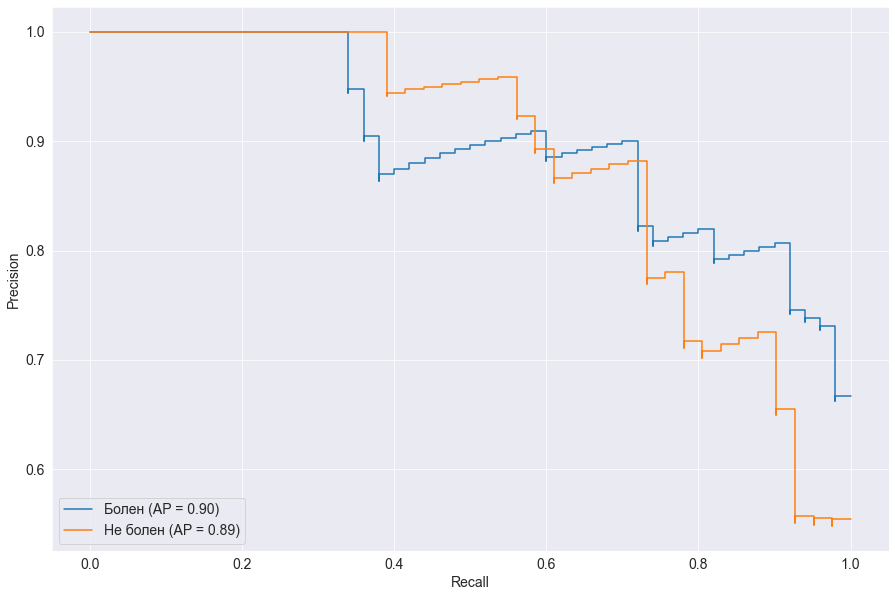

In [47]:
fig, ax = plt.subplots(1, 1)

plot_precision_recall_curve(model_clf, X_test, y_test, pos_label = 1, ax=ax, name='Болен')
plot_precision_recall_curve(model_clf, X_test, y_test, pos_label = 0, ax=ax, name='Не болен')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

- PR AUC ('Болен') = 0.90
- PR AUC ('Не болен') = 0.89

Классификатор работает неплохо

Посмотрим еще на ROC-кривую 

C:\Users\dns\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\dns\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


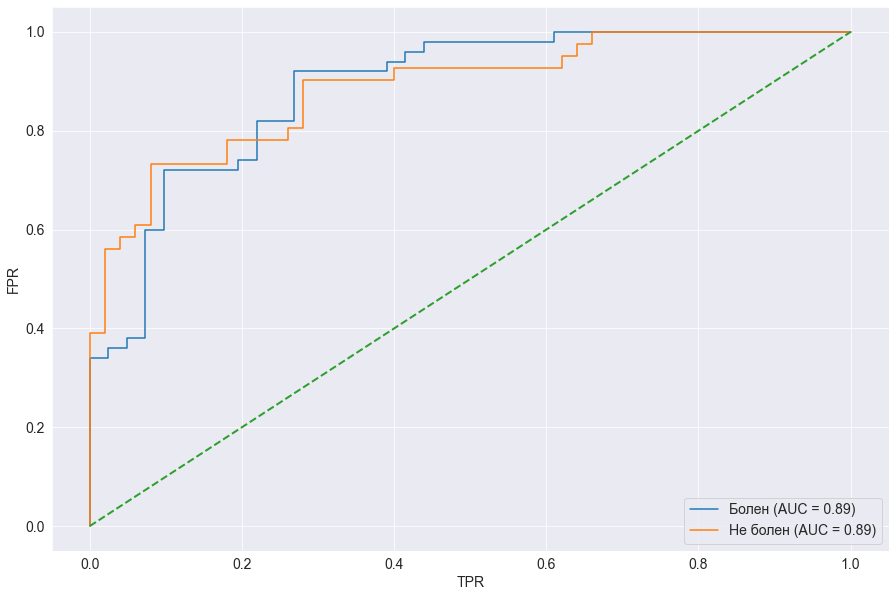

In [48]:
fig, ax = plt.subplots(1, 1)

plot_roc_curve(model_clf, X_test, y_test, pos_label = 1, ax = ax, name = 'Болен')
plot_roc_curve(model_clf, X_test, y_test, pos_label = 0, ax = ax, name = 'Не болен')
plt.plot([0, 1], [0, 1], lw = 2, linestyle='--')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

- ROC AUC ('Болен') = 0.89
- ROC AUC ('Не болен') = 0.89

Выводы:

- Выполнен анализ данных. Анализ проводился при помощи визуализации распредлений всех признаков.
- Реализована предобработка: удалены выбросы, удалены признаки, с низкой корреляцией с целевым признаком и высоким коэффициентом корреляции между парой признаков, выполнена нормализация признаков.
- В качестве модели реализована Логистическая регрессия, выполнена оценка основных метрик и визуальные представления с геометрической интерпретацией показателей.
- Точность модели составила 81%